#### Load libraries

In [1]:
import tensorflow as tf
import os
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Load data

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\train',
        target_size=(150,150),
        batch_size=16,
        class_mode='categorical',
        seed=42)



test_generator = test_datagen.flow_from_directory(
        r'C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\test',
        target_size=(150,150),
        batch_size=16,
        class_mode='categorical',
        seed=42)

Found 2800 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.


### GoogLeNet (InceptionNet)

In [13]:
base_model = InceptionV3(input_shape=(150, 150, 3), 
                         weights='imagenet', 
                         include_top=False)

# Adding custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# Combine base model and custom top layers into a new model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 74, 74, 32)   864         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_94 (BatchN  (None, 74, 74, 32)  96          ['conv2d_94[0][0]']              
 ormalization)                                                                                    
                                                                                            

In [14]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator)//32,
                    epochs=20,
                    callbacks=[callback]
                   )

Epoch 1/20
5/5 [==============================] - 4s 65ms/step - loss: 1.6497 - accuracy: 0.2375
Epoch 2/20
5/5 [==============================] - 0s 52ms/step - loss: 0.4694 - accuracy: 0.8250
Epoch 3/20
5/5 [==============================] - 0s 54ms/step - loss: 0.2122 - accuracy: 0.8875
Epoch 4/20
5/5 [==============================] - 0s 55ms/step - loss: 0.0538 - accuracy: 1.0000
Epoch 5/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0160 - accuracy: 1.0000
Epoch 6/20
5/5 [==============================] - 0s 51ms/step - loss: 0.0201 - accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 0s 53ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 8/20
5/5 [==============================] - 0s 52ms/step - loss: 0.0060 - accuracy: 1.0000
Epoch 9/20
5/5 [==============================] - 0s 55ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 10/20
5/5 [==============================] - 0s 54ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 11/20
5/5 [============

In [15]:
model.evaluate(test_generator)

75/75 [==============================] - 5s 49ms/step - loss: 0.0010 - accuracy: 1.0000


[0.0010329296346753836, 1.0]

### Single Predictions

#### Good

1/1 [==============================] - 0s 32ms/step
Predicted class: good


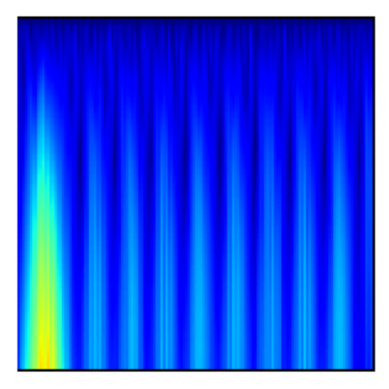

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\test\good\Sample 188.png", target_size=(150, 150))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.

plt.imshow(img)
plt.axis('off')

# Make prediction
prediction = model.predict(img_array)
classes = ['centermass', 'diaphragm', 'good', 'resonator']

predicted_class = classes[np.argmax(prediction[0])]

print("Predicted class:", predicted_class)

#### Resonator

1/1 [==============================] - 0s 35ms/step
Predicted class: resonator


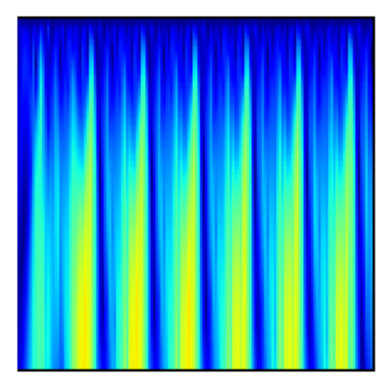

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\test\resonator\Sample 840.png", target_size=(150, 150))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.

plt.imshow(img)
plt.axis('off')

# Make prediction
prediction = model.predict(img_array)
classes = ['centermass', 'diaphragm', 'good', 'resonator']

predicted_class = classes[np.argmax(prediction[0])]

print("Predicted class:", predicted_class)

#### Centermass

1/1 [==============================] - 0s 37ms/step
Predicted class: centermass


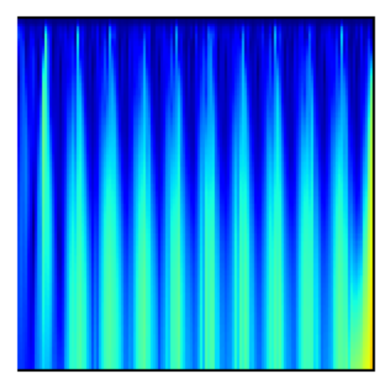

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\test\centermass\Sample 299.png", target_size=(150, 150))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.

plt.imshow(img)
plt.axis('off')

# Make prediction
prediction = model.predict(img_array)
classes = ['centermass', 'diaphragm', 'good', 'resonator']

predicted_class = classes[np.argmax(prediction[0])]

print("Predicted class:", predicted_class)

#### Diaphragm

1/1 [==============================] - 0s 37ms/step
Predicted class: diaphragm


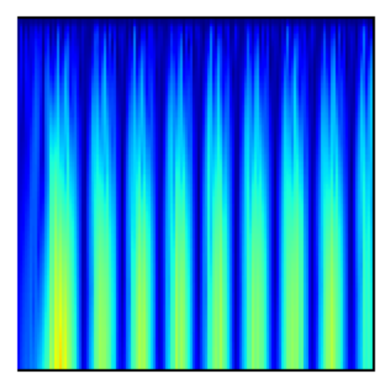

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

img = image.load_img(r"C:\Users\dasam\Downloads\New folder\New folder\Wavelet\Categorical Data\test\diaphragm\Sample 241.png", target_size=(150, 150))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.

plt.imshow(img)
plt.axis('off')

# Make prediction
prediction = model.predict(img_array)
classes = ['centermass', 'diaphragm', 'good', 'resonator']

predicted_class = classes[np.argmax(prediction[0])]

print("Predicted class:", predicted_class)